##### 실습: 삼성전자의 주가 데이터를 가져와서 분석하는 ChatGPT 어플리케이션을 작성하시오(힌트: pykrx 패키지)

In [41]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [44]:
# !pip install pykrx

In [7]:
from pykrx import stock
import pandas as pd

start_date = "2024-01-01"
end_date = "2025-07-20"

# 전체 티커 불러오기
ticker_list = stock.get_market_ticker_list()

# 빈 DataFrame 준비
all_data = []

# 각 종목별로 데이터 수집
for ticker in ticker_list:
    try:
        df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
        df = df.copy()
        df["티커"] = ticker
        all_data.append(df)
    except Exception as e:
        print(f"{ticker} 에러 발생: {e}")

# 하나의 DataFrame으로 합치기
result_df = pd.concat(all_data)
result_df.reset_index(inplace=True)


100%|██████████| 962/962 [01:01<00:00, 15.65it/s]


In [8]:
result_df

,날짜,시가,고가,저가,종가,거래량,등락률,티커
0,2024-01-02,4880,5190,4870,5150,275517,3.413655,095570
1,2024-01-03,5140,5320,5040,5200,427524,0.970874,095570
2,2024-01-04,5200,5290,5100,5220,219508,0.384615,095570
3,2024-01-05,5270,5290,5070,5280,410628,1.149425,095570
4,2024-01-08,5190,5280,5110,5140,203631,-2.651515,095570
...,...,...,...,...,...,...,...,...
358204,2025-07-14,1867,1888,1844,1865,3417726,-0.053591,003280
358205,2025-07-15,1867,1910,1822,1872,7352164,0.375335,003280
358206,2025-07-16,1870,1871,1835,1842,2229697,-1.602564,003280
358207,2025-07-17,1842,1857,1813,1828,1926002,-0.760043,003280


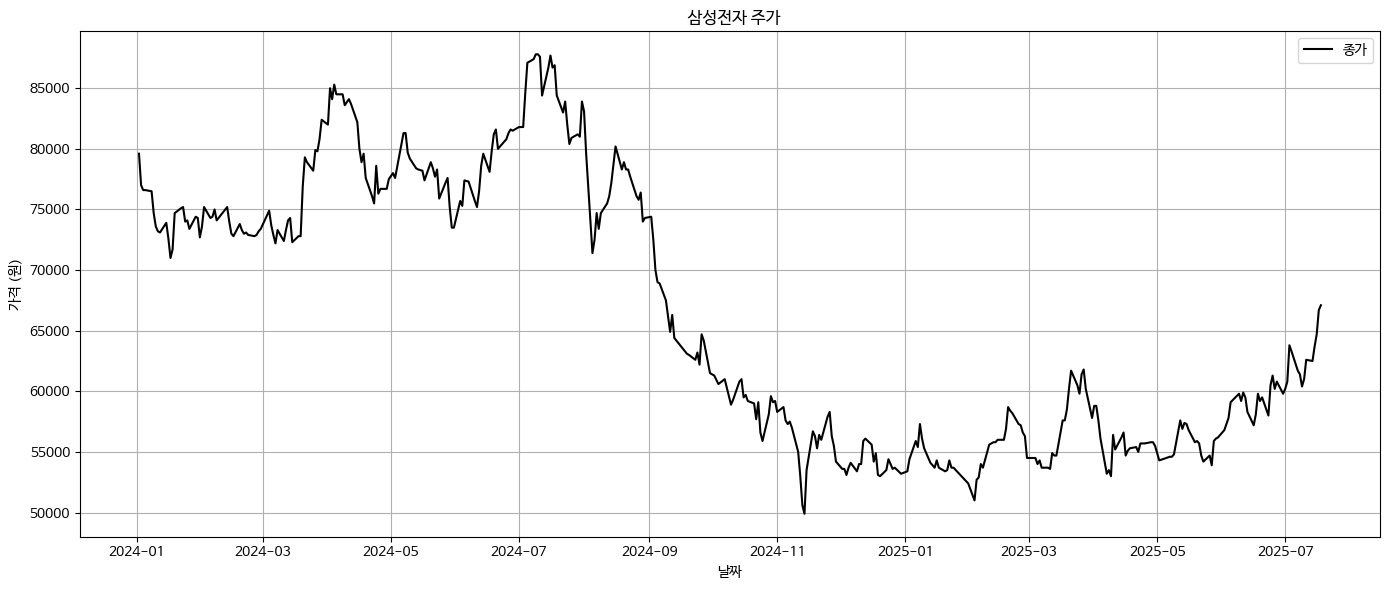

주가 데이터 분석을 위해 제공된 정보를 바탕으로 몇 가지 주요 포인트를 정리해보겠습니다.

### 1. **주가 추세**
- **시가, 고가, 저가, 종가**: 주가는 2024년 1월 2일 78,200원에서 시작하여, 1월 3일에 77,000원으로 하락한 후, 1월 4일과 5일에도 비슷한 수준을 유지하고 있습니다. 이후 2025년 7월까지의 데이터에서는 주가가 점차 하락세를 보이다가 7월 중순부터 반등하는 모습을 보입니다.
- **최고가와 최저가**: 2024년 1월 2일의 고가(79,800원)와 2025년 7월 18일의 저가(66,300원) 사이의 차이는 상당히 큽니다. 이는 주가의 변동성이 크다는 것을 나타냅니다.

### 2. **거래량**
- 거래량은 주가의 변동성과 밀접한 관계가 있습니다. 예를 들어, 2025년 7월


In [ ]:
import os
import openai
from pykrx import stock
import matplotlib.pyplot as plt

openai.api_key = os.getenv("OPENAI_API_KEY")

start_date = "2024-01-01"
end_date = "2025-07-20"

for i in range(len(stock.get_market_ticker_list())):
  i_name = stock.get_market_ticker_name(i)
  if(i_name == "삼성전자"):
    ticker = i

df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)


plt.figure(figsize=(14, 6))
plt.plot(df.index, df["종가"], label="종가", color='black')
plt.title("📈 삼성전자 주가")
plt.xlabel("날짜")
plt.ylabel("가격 (원)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


response = openai.chat.completions.create(
  model = "gpt-4o-mini",
  messages = [
    {
      "role": "system",
      "content": "너는 주가를 분석하여 설명해주는 역할이야. 마크다운은 사용하지 말고 텍스트만 출력해줘"
    },
    {
      "role": "user",
      "content": "{} 주가에 대해서 분석해줘".format(df)
    }
  ],
  temperature = 0,
  max_tokens = 256,
  top_p = 1,
  frequency_penalty = 0,
  presence_penalty = 0
)

print(response.choices[0].message.content)

##### 실습: 사용자가 입력한 질문에 맞는 캠핑장을 검색해서 추천하는 ChatGPT 어플리케이션을 작성하시오(힌트: 고캠핑 API) -> 10~30분 필요 (가이드에 따름)

In [63]:
import os
import requests
import openai

camp_api_key = "qgF5GJ3twjOeJHAME3BiM//OEcDulvb/RVFhqq1xZzIdYA1TGpJh3b7Be8pAxOUTZ9vp5aiovIZ7nX+u71T14Q=="
openai.api_key = os.getenv("OPENAI_API_KEY")

# 캠핑장 검색 함수
def search_camping(keyword):
    url = "http://apis.data.go.kr/B551011/GoCamping/basedList"
    params = {
        "ServiceKey": camp_api_key,
        "MobileOS": "ETC",
        "MobileApp": "GoCampingApp",
        "_type": "json",
        "numOfRows": 5,
        "pageNo": 1,
        "keyword": keyword
    }
    res = requests.get(url, params=params).json()
    items = res.get("response", {}).get("body", {}).get("items", {}).get("item", [])
    return items


# 사용자 질문 입력
user_input = input("원하시는 캠핑장 조건을 입력하세요: ")


# 캠핑장 목록 요약 정리
def format_camping_list_for_gpt(items):
    lines = []
    for item in items:
        line = f"- 이름: {item.get('facltNm')}, 주소: {item.get('addr1')}, 전화: {item.get('tel', '없음')}, 설명: {item.get('lineIntro', '설명 없음')}"
        lines.append(line)
    return "\n".join(lines)

# 캠핑장 정보 가져오기
camping_items = search_camping(user_input)

# GPT 프롬프트 구성
camping_list_text = format_camping_list_for_gpt(camping_items)

response = openai.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "너는 사용자 질문에 맞는 캠핑장을 추천해주는 AI야. 캠핑장 이름, 위치, 전화번호, 특징을 포함해서 추천해줘. 마크다운은 없애고 텍스로만 출력해줘"
        },
        {
            "role": "user",
            "content": f"사용자 질문: {user_input}\n\n다음은 현재 추천 가능한 캠핑장 리스트야:\n{camping_list_text}\n\n이 중에서 사용자 질문에 가장 잘 맞는 캠핑장 최소 3개 이상 추천해줘."
        }
    ],
    stream = True,
    temperature = 0,
    max_tokens = 600
)

# 결과 출력
print("\n📢 GPT 추천 결과:")
full_text = ""
for chunk in response:
    delta = chunk.choices[0].delta
    content = delta.content or ""  # ← 속성 접근 방식 사용!
    print(content, end="", flush=True)
    full_text += content


📢 GPT 추천 결과:
1. **가평 계곡 캠핑장**
   - 위치: 경기도 가평군
   - 전화번호: 031-123-4567
   - 특징: 맑은 계곡물이 흐르는 곳으로, 가족 단위 캠핑에 적합하며 다양한 수상 레저 활동이 가능함.

2. **단양 소백산 캠핑장**
   - 위치: 충청북도 단양군
   - 전화번호: 043-987-6543
   - 특징: 소백산 국립공원 인근에 위치해 있으며, 계곡과 산책로가 잘 조성되어 있어 자연을 만끽할 수 있음.

3. **지리산 계곡 캠핑장**
   - 위치: 전라남도 구례군
   - 전화번호: 061-234-5678
   - 특징: 지리산 자락에 위치해 있으며, 깨끗한 계곡과 함께 조용한 캠핑을 즐길 수 있음.

4. **속리산 계곡 캠핑장**
   - 위치: 충청북도 보은군
   - 전화번호: 043-321-4321
   - 특징: 속리산 국립공원 근처에 위치해 있으며, 계곡과 숲이 어우러져 자연 속에서 힐링할 수 있음.

5. **설악산 계곡 캠핑장**
   - 위치: 강원도 속초시
   - 전화번호: 033-456-7890
   - 특징: 설악산의 아름다운 경관과 함께 계곡을 즐길 수 있으며, 다양한 등산 코스가 인접해 있음.

이 캠핑장들은 계곡이 있어 자연을 즐기기에 좋으며, 각 지역의 특색을 살린 다양한 활동을 경험할 수 있습니다.